In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import sklearn

from itertools import *
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import re
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [4]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
df_no_missing = df.dropna()

# A. Different Regression Algorithm

### 1. Regular Linear Regression

We first try out some different regressions to come up with some models to predict the imdb_score.

#### Feature Selection 
> Here, we decide use only five variables to experience different modeling without using techniques of spliting training and testing data

In [6]:
df_lm = df_no_missing.select_dtypes(include=['float64', 'int64'])

In [7]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
df_lm_x = df_lm.drop(['imdb_score'], axis = 1)
df_lm_y = df_lm['imdb_score']

lm = linear_model.LinearRegression()
rfe = RFE(lm, 1)
rfe = rfe.fit(df_lm_x, df_lm_y)

rfe.support_
rfe.ranking_

list_df5 = []
for x in range(5):

    loc = np.where(rfe.ranking_ == x + 1)[0][0]
    list_df5.append(df_lm_x.iloc[:,loc])
    print(loc)

df_5 = pd.DataFrame(list_df5).T
df_5['imdb_score'] = df_lm_y
df_5.head()

13
8
1
11
0


,aspect_ratio,facenumber_in_poster,duration,title_year,num_critic_for_reviews,imdb_score
0,1.78,0.0,178.0,2009.0,723.0,7.9
1,2.35,0.0,169.0,2007.0,302.0,7.1
2,2.35,1.0,148.0,2015.0,602.0,6.8
3,2.35,0.0,164.0,2012.0,813.0,8.5
5,2.35,1.0,132.0,2012.0,462.0,6.6


In [8]:
lm = linear_model.LinearRegression()
lm.fit(df_5.drop(['imdb_score'], axis = 1), df_5['imdb_score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
sklearn.metrics.r2_score(df_5['imdb_score'], lm.predict(df_5.drop(['imdb_score'], axis = 1)))

0.26849173666333448

### 2. Ridge Regression

In [10]:
rg = linear_model.Ridge(alpha = 0.1)
rg.fit(df_5.drop(['imdb_score'], axis = 1), df_5['imdb_score'])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
sklearn.metrics.r2_score(df_5['imdb_score'], rg.predict(df_5.drop(['imdb_score'], axis = 1)))

0.26849173663937942

### 3. Lasso Regression (shrinkage :0.01)

In [12]:
lasso = linear_model.Lasso(alpha = 0.01)
lasso.fit(df_5.drop(['imdb_score'], axis = 1), df_5['imdb_score'])
sklearn.metrics.r2_score(df_5['imdb_score'], lasso.predict(df_5.drop(['imdb_score'], axis = 1)))

0.26802584382856476

### 4. Beyasian Ridge Regression

In [13]:
Bay = linear_model.BayesianRidge()
Bay.fit(df_5.drop(['imdb_score'], axis = 1), df_5['imdb_score'])
sklearn.metrics.r2_score(df_5['imdb_score'], Bay.predict(df_5.drop(['imdb_score'], axis = 1)))

0.26814752665403041

### 5. Polynomial Regression

In [14]:
X = df_5.drop(['imdb_score'], axis = 1)
y = df_5['imdb_score']

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
              

In [15]:
clf = linear_model.LinearRegression()
clf.fit(X_, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
sklearn.metrics.r2_score(y, clf.predict(X_))

0.31007975097052121

## Discussion
> The Lasso Regression tend to have relatively lower MSE, which means in this specific case Lasso Regression works the best when assessing imdb_score


# B. Evaluating Two Models (With Cross Validation Techniques)

## 1. Linear Regression Evaluation
Since there are different combinations of these five predictors, we decide to test which particular combination of features provide the best result in terms of predicting imdb_score.

In [17]:
itrain, itest = train_test_split(df_5, test_size = 0.2, random_state=66)

Here, we first split the data into training and testing set. After doing the split, we decide to use k-fold cross validation for training set. We used 4 folds in this case and evaluate MSE for each individual case. Then we average the MSEs for different combination to assess which particular combination is the best in terms of prediction.

In [18]:
n_folds=4
overall_result = []
comb_list = []
for x in range(2,6):
    a = combinations('01234', x)
    for numb in a:
        list_new = []
        comb_list.append(numb)
        for n in numb:
            n = int(n)
            list_new.append(itrain.iloc[:,int(n)])
        list_new.append(itrain['imdb_score'])   
        df_new = pd.DataFrame(list_new).T

        result_spread = []
        for train, test in KFold(len(df_new), n_folds):


            intrain = df_new.iloc[train]
            invalid = df_new.iloc[test]
            lm = linear_model.LinearRegression()
            lm.fit(intrain.drop(['imdb_score'], axis = 1), intrain['imdb_score'])

            result_spread.append(mean_squared_error(invalid['imdb_score'], lm.predict(invalid.drop(['imdb_score'], axis = 1))))
        overall_result.append((np.mean(result_spread), np.min(result_spread), np.max(result_spread)))

In [19]:
c_list = []
for n in comb_list:
    c_list.append(len(n))

print('There are %d combinations when we choose 2 variables' % (c_list.count(2)))
print('There are %d combinations when we choose 3 variables' % (c_list.count(2)))
print('There are %d combinations when we choose 4 variables' % (c_list.count(2)))
print('There are %d combinations when we choose 5 variables' % (c_list.count(2)))
len(comb_list)

There are 10 combinations when we choose 2 variables
There are 10 combinations when we choose 3 variables
There are 10 combinations when we choose 4 variables
There are 10 combinations when we choose 5 variables


26

In [20]:
min_err = [r[0] for r in overall_result]
index = np.where(min_err == np.min(np.min(min_err)))[0][0]
print(comb_list[index])
itrain.columns[[1,2,3,4]]

('1', '2', '3', '4')


Index(['facenumber_in_poster', 'duration', 'title_year', 'num_critic_for_reviews'], dtype='object')

We find that when we use 'facenumber_in_poster', 'duration', 'num_critic_for_reviews', 'num_user_for_reviews' as variables, we get the least mean_squared_error in cross validation process.

Therefore, we decide to re-train the whole training data on those four features and evaluate it generalization capacity in testing samples.

In [21]:
# Retrain the whole training data use these 4 variables as predictors
lm = linear_model.LinearRegression()
lm.fit(itrain.iloc[:,1:5], itrain['imdb_score'])
pred = lm.predict(itest.iloc[:,1:5])
mse = mean_squared_error(itest['imdb_score'], pred)

Here, we visualiza MSE across all the combinations. Blue line is cross validation error for each different combinations of features. And the green line represents the MSE of training model on testing samples if we use the particular combination of different features which give us the least mean squared error to train the data. The blue area represents the spread of MSE.

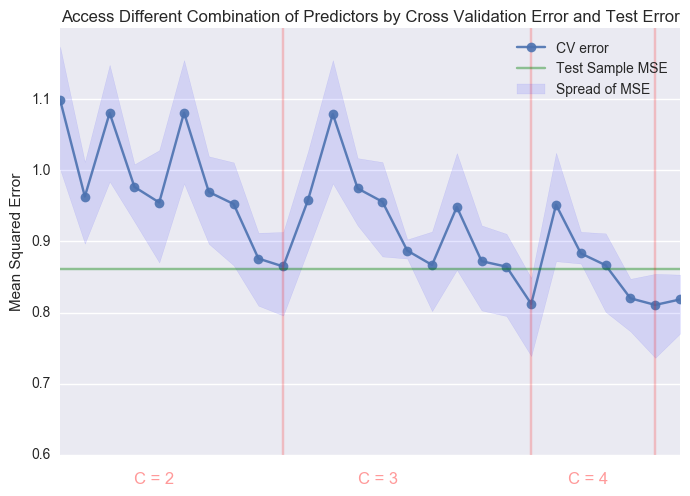

In [22]:
#plt.plot(x,[r[0] for r in overall_result], marker = 'o', label = 'CV error')
plt.plot(np.arange(len(comb_list)),[r[0] for r in overall_result], marker = 'o', label = 'CV error', alpha = 0.9)
plt.fill_between(np.arange(len(comb_list)), 
                 [r[1] for r in overall_result], [r[2] for r in overall_result], color = 'b', alpha=0.1, label = 'Spread of MSE')
plt.axhline(y=mse, color = 'g', alpha = 0.4, label = 'Test Sample MSE')
plt.axvline(x=9, color = 'r', alpha = 0.2)
plt.axvline(x=19, color = 'r', alpha = 0.2)
plt.axvline(x=24, color = 'r', alpha = 0.2)
plt.title('Access Different Combination of Predictors by Cross Validation Error and Test Error')
plt.ylabel('Mean Squared Error')
plt.ylim((0.6,1.2))
plt.xticks([], [])
plt.legend()
plt.text(3, 0.56, r'C = 2', color = 'r', alpha = 0.4)
plt.text(12, 0.56, r'C = 3', color = 'r', alpha = 0.4)
plt.text(20.5, 0.56, r'C = 4', color = 'r', alpha = 0.4)

## 1. Polynomial Regression Degree Evaluation
Since there are different degree we can use for polynomial regression, we decide to test which particular degree of polynomial provide the best result in terms of predicting imdb_score.

In [23]:
def make_poly(x, y, degrees):
    poly = PolynomialFeatures(degree = degrees)
    x_ = poly.fit_transform(x)
    clf = linear_model.LinearRegression()
    clf.fit(x_, y)
    return clf

In [24]:
degrees = np.arange(1,5,1)
poly_d_result = []
for d in degrees:
    poly_result = []
    for train, test in KFold(len(itrain), n_folds):

        intrain = itrain.iloc[train]
        invalid = itrain.iloc[test]
        
        poly = PolynomialFeatures(degree = d)
        PolyR = make_poly(intrain.drop(['imdb_score'], axis=1), intrain['imdb_score'], d)
        invalid_x = poly.fit_transform(invalid.drop(['imdb_score'], axis=1))
        pred = PolyR.predict(invalid_x)
        
        poly_result.append(mean_squared_error(invalid['imdb_score'], pred))
    
    print(poly_result)
    poly_d_result.append((np.mean(poly_result), np.min(poly_result), np.max(poly_result)))
    
    
print(poly_d_result)

[0.8183832840320342, 0.85330225815790028, 0.8314767136063318, 0.77032747003579105]
[0.7855469755413339, 0.79577366624386703, 0.77650536275845239, 4.2772226313505888]
[0.79321595664788791, 1.3060457173361655, 0.77920550381350051, 401414.37090362195]
[0.81822881082086152, 570.7404424821575, 1.0140170240204536, 7067285.1338559445]
[(0.8183724314580143, 0.77032747003579105, 0.85330225815790028), (1.6587621589735604, 0.77650536275845239, 4.2772226313505888), (100354.31234269994, 0.77920550381350051, 401414.37090362195), (1766964.4266360654, 0.81822881082086152, 7067285.1338559445)]


In [25]:
poly_mse = [r[0] for r in poly_d_result]
print('mean squared error is the smallest when we use %d degree polynomial regression '
      % (1+np.where(poly_mse == np.min(poly_mse))[0][0]))
PolyR = make_poly(itrain.drop(['imdb_score'], axis=1), itrain['imdb_score'], 1)
poly = PolynomialFeatures(degree = 1)
pred = PolyR.predict(poly.fit_transform(itest.drop(['imdb_score'], axis=1)))
mse = mean_squared_error(itest['imdb_score'],pred)

mean squared error is the smallest when we use 1 degree polynomial regression 


Unfortunately, from the result, it is apparent that when we increase the degree, the model has lower prediction ability. Here is the graph for MSE and Spread of MSE for different degree

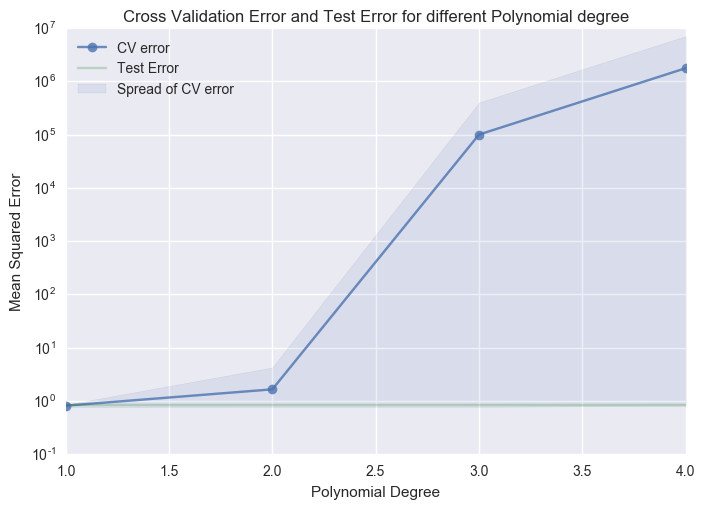

In [26]:
plt.plot(degrees, [r[0] for r in poly_d_result], 'o-', label = 'CV error', alpha = 0.8)
plt.fill_between(degrees, [r[1] for r in poly_d_result], [r[2] for r in poly_d_result], alpha = 0.1, label = 'Spread of CV error')
plt.axhline(y = mse, color = 'green', alpha = 0.2, label = 'Test Error')
plt.yscale('log')
plt.title('Cross Validation Error and Test Error for different Polynomial degree')
plt.ylabel('Mean Squared Error')
plt.xlabel('Polynomial Degree')
plt.legend(loc = 2)

# C. Split Data in Different Training vs. Testing set size

To examine the effect of using different testing size for model evaluation, in order to make the evaluation effect more valid. We decide to use cross validation technique in this case.

In [27]:
df_lm = df_lm.drop(['title_year'], axis = 1)

We write loops that can split dataset which contain 10% of testing set, 20% of testing set all the way up to 90% of testing set. Then we use split the training set into four folds so that we can get more have more accurate assessment.

In [28]:
final_result = []
test_result = []
for i in np.arange(0.1, 1.0, 0.1):
    Temp_train, Temp_test = train_test_split(df_lm, test_size = i, random_state=2666)
    
    count = 0 
    count = count + 1
    
    kfold_result = []
    for train, valid in KFold(len(Temp_train), 4):
        train = Temp_train.iloc[train]
        valid = Temp_train.iloc[valid]
        lm = linear_model.LinearRegression()
        lm.fit(train.drop(['imdb_score'], axis = 1), train['imdb_score'])
        pred = lm.predict(valid.drop(['imdb_score'], axis = 1))
        
        Temp_mse = mean_squared_error(valid['imdb_score'], pred)
        kfold_result.append(Temp_mse)
    
    final_result.append((np.mean(kfold_result), np.min(kfold_result), np.max(kfold_result)))

    lm = linear_model.LinearRegression()
    lm.fit(Temp_train.drop(['imdb_score'], axis = 1), Temp_train['imdb_score'])
    pred = lm.predict(Temp_test.drop(['imdb_score'], axis = 1))
    test_acc = mean_squared_error(Temp_test['imdb_score'], pred)
    test_result.append(test_acc)
    
    

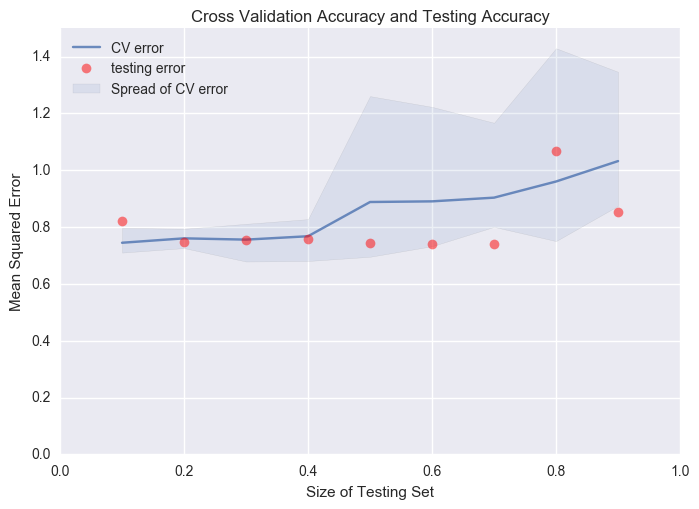

In [29]:
with sns.axes_style('darkgrid'):
    plt.plot(np.arange(0.1, 1.0, 0.1), [r[0] for r in final_result], label = 'CV error', alpha = 0.8)
    plt.plot(np.arange(0.1, 1.0, 0.1), test_result, 'o', label = 'testing error', alpha = 0.5, color = 'r')
    plt.fill_between(np.arange(0.1, 1.0, 0.1), [r[1] for r in final_result], [r[2] for r in final_result], alpha = 0.1,
                label = 'Spread of CV error')
    plt.legend(loc = 2)
    plt.title('Cross Validation Accuracy and Testing Accuracy')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Size of Testing Set')
    plt.xlim((0,1))
    plt.ylim((0,1.5))

### Discussion

From the visualization, in the cross-validation scenario, we can see that when the size of testing set increases, there tend to be more variability in terms of mean squared error between model prediction and actual value. In addition, the mean squared error appears to have negatively correlation with the size of testing set. The same phenomenon can also be observed when we try to use testing sample to test the accuracy of our training model. When size of test set increase, our model generally is less accurate in terms of predictions on testing samples.

The reason why this happen is because when we distribute too much data to the testing set, we have only a small portion of data left for the training set. Our model may not be generalizable due to insufficient data for training. One of the things I learnt from this exercise is that we need to pay particular attention when we try to split training and testing set from the data samples. Distributing too much data samples for testing set will make our training model inaccurate and note generalizable.

# D. Bonus

Rather than predicting the specific score, we want to build classification model by adding a column of Recommendation variable based on imdb_score (if the movie's imdb_score is greater than the mean, the movie will be label as 'Good', vice versa)

we decide to take a step further and try to include variables as much as possible to make predictions

In [30]:
df_no_missing.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [41]:
df_no_missing_clean = df_no_missing

In [42]:
df_no_missing_clean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


### Drop useless variables

> Because titles and names may not be particularly useful to our classification model, we decide to drop these useless variables

In [43]:
dfc = df_no_missing_clean.drop(['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords',
                         'movie_imdb_link'], axis = 1)

### Recode and Convert quanlitative variables into dummies

In [44]:
dfc = dfc.reset_index(drop = True)


In [45]:
dfc['title_year'] = dfc['title_year'].astype(str)
dfc['title_year'] = dfc['title_year'].str.replace(r'.0$', '')

In [46]:
dfc.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000
4,Color,462.0,132.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873,1.0,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000


In [47]:
dfc['genres'] = dfc['genres'].str.replace('\W+.*', '')

In [48]:
dfc['color'].unique()[1]

' Black and White'

In [49]:
dfc.color[dfc.color == 'Color'] = 1
dfc.color[dfc.color == ' Black and White'] = 0

C:\Users\Seuphor\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Seuphor\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [50]:
dfc.color.unique()

array([1, 0], dtype=object)

In [51]:
dfc.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action,886204,4834,0.0,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action,471220,48350,0.0,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0
2,1,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action,275868,11700,1.0,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000
3,1,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action,1144337,106759,0.0,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000
4,1,462.0,132.0,475.0,530.0,640.0,73058679.0,Action,212204,1873,1.0,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000


In [58]:
dfc.dtypes

color                         object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
genres                        object
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                    object
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [59]:
dfc.drop(['genres', 'language', 'country', 'content_rating', 'title_year'], axis = 1).head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,1,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,1,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
4,1,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000


In [61]:
np.mean(dfc.imdb_score)

6.4652822151224525

In [62]:
dfc['Recommendation'] = 0
dfc.Recommendation[dfc.imdb_score >= np.mean(dfc.imdb_score)] = 1
dfc.Recommendation[dfc.imdb_score < np.mean(dfc.imdb_score)] = 0

C:\Users\Seuphor\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Seuphor\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [63]:
pro_df = pd.concat([dfc.drop(['genres', 'language', 'country', 'content_rating', 'title_year'], axis = 1),
                   pd.get_dummies(dfc.genres).astype(np.int64).drop(pd.get_dummies(dfc.genres).columns[0], axis = 1),
                   pd.get_dummies(dfc.language).astype(np.int64).drop(pd.get_dummies(dfc.language).columns[0], axis = 1),
                   pd.get_dummies(dfc.country).astype(np.int64).drop(pd.get_dummies(dfc.country).columns[0], axis = 1),
                   pd.get_dummies(dfc.content_rating).astype(np.int64).drop(pd.get_dummies(dfc.content_rating).columns[0], axis = 1),
                   pd.get_dummies(dfc.title_year).astype(np.int64).drop(pd.get_dummies(dfc.title_year).columns[0], axis = 1)],
                   axis = 1)

In [64]:
pro_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Recommendation,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci,Thriller,Western,Arabic,Aramaic,Bosnian,Cantonese,Czech,Danish,Dari,Dutch,English,Filipino,French,German,Hebrew,Hindi,Hungarian,Indonesian,Italian,...,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
pro_df.color = pro_df.color.astype(np.int64)

### Standardize all the variables
> Since we are going to use PCA and SVM, we need to re-scale the variables by standardizing them.

In [67]:
std_scale = (pro_df - pro_df.mean()) / pro_df.std()

In [68]:
std_scale.std()

color                        1.0
num_critic_for_reviews       1.0
duration                     1.0
director_facebook_likes      1.0
actor_3_facebook_likes       1.0
actor_1_facebook_likes       1.0
gross                        1.0
num_voted_users              1.0
cast_total_facebook_likes    1.0
facenumber_in_poster         1.0
num_user_for_reviews         1.0
budget                       1.0
actor_2_facebook_likes       1.0
imdb_score                   1.0
aspect_ratio                 1.0
movie_facebook_likes         1.0
Recommendation               1.0
Adventure                    1.0
Animation                    1.0
Biography                    1.0
Comedy                       1.0
Crime                        1.0
Documentary                  1.0
Drama                        1.0
Family                       1.0
Fantasy                      1.0
Horror                       1.0
Musical                      1.0
Mystery                      1.0
Romance                      1.0
          

In [69]:
std_x = std_scale.drop(['Recommendation'], axis = 1)
std_y = dfc['Recommendation']

### PCA
we decide to generate two principal components by using PCA model. In this case, we try to reduce this large dimension dataset into two main dimension.

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(std_x)


PCA(copy=True, n_components=2, whiten=False)

In [71]:
print(pca.explained_variance_)

[ 4.673128    3.22573814]


In [72]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(copy=True, n_components=2, whiten=False)>

In [73]:
pca.transform(std_x)

array([[ -9.98566654e+00,  -1.27294617e+00],
       [ -5.20930744e+00,  -4.77834664e-03],
       [ -4.68919103e+00,  -1.73580340e+00],
       ..., 
       [  7.26835895e-01,   2.50019189e-01],
       [  2.77194422e+00,  -3.58810984e+00],
       [  2.20633056e+00,   6.62829033e-01]])

In [74]:
df_pca = pd.concat([pd.DataFrame(pca.transform(std_x)), pd.DataFrame(std_y)], axis = 1)

In [75]:
df_pca.columns = ['PC1', 'PC2', 'Recommendation']

### PCA principal components visualizations

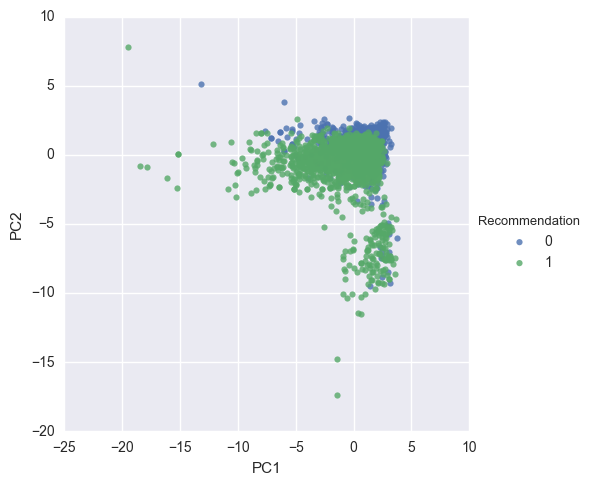

In [76]:
sns.lmplot(x="PC1", y="PC2", hue="Recommendation", data=df_pca, fit_reg=False)

### SVM (RBF Kernel)
After generating two principal components, we decide to use SVM with RBF Kernel to finish this classification process.

In [77]:
from sklearn import svm
itrain, itest = train_test_split(df_pca, test_size = 0.2, random_state = 77)
#svm_x = itrain.drop(['Recommendation'], axis = 1)
#svm_y = itrain.Recommendation

#clf = svm.SVC(kernel = 'rbf', gamma=1)
#clf.fit(svm_x, svm_y)
#pred = clf.predict(itest.drop(['Recommendation'], axis = 1))


### Evaluation and Cross Validation

Here, we try different gamma and C parameters for the training model after we spliting data into training, testing and validation set. 

In [78]:
gamma_choice = [10**(-1), 10**(0), 10**(1)]
C_choice = [10**(-2), 10**(-1), 10**(0), 10**(1), 10**(2)]

cm_gamma = []
for g in gamma_choice:     

    cm_para = []
    for para in C_choice:
        
        cm_cross = []
        for train, valid in KFold(len(itrain), 5):
            svm_train = itrain.iloc[train]
            svm_valid = itrain.iloc[valid]
            clf = svm.SVC(kernel = 'rbf', C = para, gamma = g)
            clf.fit(svm_train.drop(['Recommendation'], axis = 1), svm_train['Recommendation'])
            pred = clf.predict(svm_valid.drop(['Recommendation'], axis = 1))
            
            cm = confusion_matrix(svm_valid['Recommendation'], pred)
            cm_std = cm / cm.sum(axis = 1).reshape(-1,1)
            
            cm_cross.append(cm_std)
        
        cm_para.append(np.mean(cm_cross, axis = 0))
    cm_gamma.append(cm_para)

After standardizing the confusion matrix, we think the model which has the most predictive ability should have the highest value of sum in its diagnoal (True positive rate + True negative rate)

In [81]:
sum_gamma_para = []
for i in range(3):
    sum_para = [np.sum(np.matrix.diagonal(arr)) for arr in cm_gamma[i]]
    sum_gamma_para.append(sum_para)

In [83]:
np.max(sum_gamma_para)

1.490704508698208

In [86]:
for i in range(3):
    try:
        find = sum_gamma_para[i].index(1.490704508698208)
        print('Found the Value: We get the most accuracy in rbf kernel when we use %0.2f for gamma and %0.2f for C parameters'
              % (gamma_choice[i], C_choice[sum_gamma_para[i].index(1.490704508698208)]))
        break
    
    except ValueError:
        print('Error Message: Trying this again')

Error Message: Trying this again
Found the Value: We get the most accuracy in rbf kernel when we use 1.00 for gamma and 1.00 for C parameters


In [87]:
svm_x = itrain.drop(['Recommendation'], axis = 1)
svm_y = itrain.Recommendation

clf = svm.SVC(kernel = 'rbf', C = 1, gamma = 1)
clf.fit(svm_x, svm_y)
pred = clf.predict(itest.drop(['Recommendation'], axis = 1))


After finding the optimal parameter and training the whole training set with those parameters, we test our model on the test sampels and make a visualization for confusion matrix.

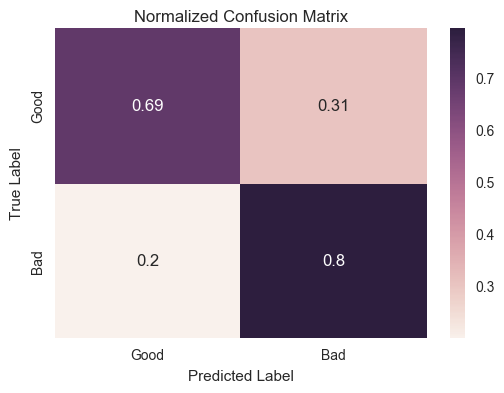

In [88]:
cm = confusion_matrix(itest['Recommendation'], pred)
cm_std = cm / cm.sum(axis = 1).reshape(-1,1)

cm_df = pd.DataFrame(cm_std, index = ['Good', 'Bad'], columns = ['Good', 'Bad'])
plt.figure(figsize = (6,4))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Normalized Confusion Matrix')

Using Support Vector Machine Algorithm with RBF Kernel , our model have true negative rate of 80% and true positive rate around 70%